## **Name of group members:**

- **NGUEPONWOUO Joseph-Marie**
- **GARDIN Emmanuel**



### **NUMERICAL METHODS FOR PDE IN FINANCE : MEAN FIELD GAMES WITH CONGESTION EFFECTS**

In [1]:
import numpy as np
import scipy
import scipy.sparse as sp
import time

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# **1. Finite Differences Operators**

We introduce the following finite differences operators:

$$
∂_t \ w(t_n, x) \Longleftrightarrow  (D_t \ W)^n = \frac{W^{n+1} - W^n}{\Delta t}, \ \ n \in {0, ..., N_T - 1}, \ W \in \mathbb{R}^{N_T + 1} \\
∂_x \ w(t, x_i) \Longleftrightarrow  (D_x \ W)_i = \frac{W_{i+1} - W_i}{h}, \ \ i \in {0, ..., N_h - 1}, \ W \in \mathbb{R}^{N_h} \\
∂_x^2 \ w(t, x_i) \Longleftrightarrow  (\Delta_h \ W)_i = \frac{W_{i+1} - 2W_i + W_{i-1}}{h^2}, \ \ i \in {0, ..., N_h - 1}, \ W \in \mathbb{R}^{N_h} \\
[∇_h W]_i = ((DW)_i, (DW)_{i-1}), \ \ i \in {0, ..., N_h - 1}, \ W \in \mathbb{R}^{N_h}
$$


$$
\left(\partial_x (t_n, x_i) \right)_{}
\longleftrightarrow
\frac{1}{h}
\begin{pmatrix}
-1 & 1 & 0 & 0 & \cdots & 0 \\\\
0 & -1 & 1 & 0 & \cdots & 0 \\\\
0 & 0 & -1 & 1 & \cdots & 0 \\\\
\vdots & \vdots & \vdots & \ddots & \ddots & \vdots \\\\
0 & 0 & 0 & \cdots & -1 & 1 \\\\
0 & 0 & 0 & \cdots & 0 & 0
\end{pmatrix}
\quad
\begin{pmatrix}
W_0^0 & W_0^1 & \cdots & W_0^{N_T} \\\\
W_1^0 & W_1^1 & \cdots & W_1^{N_T} \\\\
\vdots & \vdots & \ddots & \vdots \\\\
W_{N_h-1}^0 & W_{N_h-1}^1 & \cdots & W_{N_h-1}^{N_T}
\end{pmatrix}
$$

In the last row, we took into account Neumann conditions, considering the fact that $U_{N_h} = U_{N_h - 1}$ and $M_{N_h} = M_{N_h - 1}$. Let $D_x$ be the matrix above.

Again, taking into account Neumann conditions:

$$
\left( \partial_x^2 (t_n, x_i) \right)_{\substack{0 \leq n \leq N_T \\ 0 \leq i \leq N_h - 1}}
\longleftrightarrow
\frac{1}{h^2}
\begin{pmatrix}
-1 & 1 & 0 & 0 & \cdots & 0 \\\\
1 & -2 & 1 & 0 & \cdots & 0 \\\\
0 & 1 & -2 & 1 & \cdots & 0 \\\\
\vdots & \vdots & \ddots & \ddots & \ddots & \vdots \\\\
0 & 0 & \cdots & 0 & -2 & 1 \\\\
0 & 0 & \cdots & 0 & 1 & -1
\end{pmatrix}
\quad
\begin{pmatrix}
W_0^0 & W_0^1 & \cdots & W_0^{N_T} \\\\
W_1^0 & W_1^1 & \cdots & W_1^{N_T} \\\\
\vdots & \vdots & \ddots & \vdots \\\\
W_{N_h-1}^0 & W_{N_h-1}^1 & \cdots & W_{N_h-1}^{N_T}
\end{pmatrix}
$$

Denote by $D_x^2$ the matrix above.

Notice that the matrix of

$$
((DW)_{i-1} = \frac{1}{h}(W_i - W_{i-1}))_{0 \leq i < N_h}
$$

is (because of Neumann conditions):

$$
\frac{1}{h}
\begin{pmatrix}
0 & 0 & 0 & 0 & \cdots & 0 \\\\
-1 & 1 & 0 & 0 & \cdots & 0 \\\\
0 & -1 & 1 & 0 & \cdots & 0 \\\\
\vdots & \vdots & \ddots & \ddots & \ddots & \vdots \\\\
0 & 0 & \cdots & 0 & -1 & 1
\end{pmatrix}
$$




# **2. Solving HJB Equation**

To elaborate a discrete version of the HJB equation, we need to have a discrete version of the Hamiltonian. We will model $H_0(p, \mu) = \frac{1}{\beta} \frac{|p|^\beta}{(c_0 + c_1 \mu)^\alpha}$ by:

$$
\tilde{H}(p_1, p_2, \mu) = \frac{1}{\beta} \frac{\left( (p_1)_-^2 + (p_2)_+^2 \right)^{\frac{\beta}{2}}}{(c_0 + c_1 \mu)^\alpha} \tag{16}
$$

where $x_+ = \max(0, x)$ and $x_- = \max(0, -x)$. Note that $\tilde{H}$ takes three arguments.

We can now consider the following discrete version of the HJB equation, supplemented with the Neumann conditions and the terminal condition:

$$
\left\{
\begin{aligned}
    &-(D_t U_i)^n - \nu (\Delta_h U^n)_i + \tilde{H}(\nabla_h U^n]_i, M_i^{n+1}) = g(x_i) + \tilde{f}_0(M_i^{n+1}), & \quad 0 \le i < N_h, \; 0 \le n < N_T \\\\
    &U_{-1}^n = U_0^n, & \quad 0 \le n < N_T \\\\
    &U_{N_h}^n = U_{N_h-1}^n, & \quad 0 \le n < N_T \\\\
    &U_i^{N_T} = \phi(M_i^{N_T}), & \quad 0 \le i < N_h
\end{aligned}
\right.
\tag{17}
$$

This scheme is an implicit Euler scheme since the equation is backward in time. Given $M^{n+1}$ and $U^{n+1}$, we will solve equation $(17)$ for $U^n$.

We introduce

$$
\mathbb{F}(U^n, U^{n+1}, M^{n+1}) :=
\begin{pmatrix}
-(D_t U_0)^n - \nu (\Delta_h U^n)_0 + \tilde{H}([\nabla_h U^n]_0, M_0^{n+1}) - g(x_0) - \tilde{f}_0(M_0^{n+1}) \\\\
\vdots \\\\
-(D_t U_i)^n - \nu (\Delta_h U^n)_i + \tilde{H}([\nabla_h U^n]_i, M_i^{n+1}) - g(x_i)  - \tilde{f}_0(M_i^{n+1}) \\\\
\vdots \\\\
-(D_t U_{N_h-1})^n - \nu (\Delta_h U^n)_{N_h-1} + \tilde{H}([\nabla_h U^n]_{N_h-1}, M_{N_h - 1}^{n+1}) - g(x_{N_h-1})- \tilde{f}_0(M_{N_h-1}^{n+1})
\end{pmatrix}
$$

When solving the HJB equation, our goal is to find $U^n$ knowing $U^{n+1}$ and $M^{n+1}$. The condition $U_i^{N_T} = \phi(M_i^{N_T})$ allows initialization for $n = N_T$. For $n < N_T$, we use Newton-Raphson iterations, which consists in estimating $U^n$ as the limit of a sequence $(U^{n, k})_k$ defined by

$$
U^{n, k+1} = U^{n, k} - \mathbb{J}^{-1}(U^{n, k}, U^{n+1}, M^{n+1}) \mathbb{F}(U^{n, k}, U^{n+1}, M^{n+1}) \tag{18}
$$

where $\mathbb{J}(V, U^{n+1}, M^{n+1})$ is the Jacobian of the map $V \mapsto \mathbb{F}(V, U^{n+1}, M^{n+1})$.

We may initialize $U^{n, 0} = U^{n+1}$. The Newton iterations are stopped when $\|\mathbb{F}(U^{n, k}, U^{n+1}, M^{n+1})\|$ is below a given threshold, say $10^{-12}$.

**Closed form of the Jacobian**  
Let $\mathbb{F}_i$ be the $i$-th coordinate of $\mathbb{F}(U^n, U^{n+1}, M^{n+1})$. The Jacobian of the function $V \mapsto \mathbb{F}(V, U^{n+1}, M^{n+1})$ is defined as:

$$
\mathbb{J}(V, U^{n+1}, M^{n+1}) =
\begin{pmatrix}
\frac{\partial \mathbb{F}_0}{\partial V_0} & \frac{\partial \mathbb{F}_0}{\partial V_1} & \cdots & \frac{\partial \mathbb{F}_0}{\partial V_{N_h-1}} \\\\
\frac{\partial \mathbb{F}_1}{\partial V_0} & \frac{\partial \mathbb{F}_1}{\partial V_1} & \cdots & \frac{\partial \mathbb{F}_1}{\partial V_{N_h-1}} \\\\
\vdots & \vdots & \ddots & \vdots \\\\
\frac{\partial \mathbb{F}_{N_h-1}}{\partial V_0} & \frac{\partial \mathbb{F}_{N_h-1}}{\partial V_1} & \cdots & \frac{\partial \mathbb{F}_{N_h-1}}{\partial V_{N_h-1}}
\end{pmatrix}
\tag{19}
$$

Notice that (setting $A = -g(x_i) - \tilde{f}_0(M_i^{n+1})$):

$$
\mathbb{F}_i = -(D_t U_i)^n - \nu (\Delta_h U^n)_i + \tilde{H}([\nabla_h U^n]_i, M_i^{n+1}) - g(x_i) - \tilde{f}_0(M_i^{n+1})
$$
$$
= -\frac{U_i^{n+1} - U_i^n}{\Delta t} - \nu \frac{U_{i+1}^n - 2U_i^n + U_{i-1}^n}{h^2} + \frac{1}{\beta (c_0 + c_1 M_i^{n+1})^\alpha h^\beta} \left( ((U_{i+1}^n - U_i^n)_-)^2 + ((U_i^n - U_{i-1}^n)_+)^2 \right)^{\beta/2} + A
$$

This term only depends on $U_{i-1}^n, U_i^n, U_{i+1}^n$, so the Jacobian is a tridiagonal matrix. Moreover:

$$
\frac{\partial \mathbb{F}_i}{\partial U_{i-1}^n} = -\frac{\nu}{h^2} - \frac{1}{(c_0 + c_1 M_i^{n+1})^\alpha h^\beta} (U_i^n - U_{i-1}^n)_+ \left( ((U_{i+1}^n - U_i^n)_-)^2 + ((U_i^n - U_{i-1}^n)_+)^2 \right)^{\beta/2 - 1}
$$

$$
\frac{\partial \mathbb{F}_i}{\partial U_i^n} = \frac{1}{\Delta t} + \frac{2\nu}{h^2} + \frac{1}{(c_0 + c_1 M_i^{n+1})^\alpha h^\beta} \left( (U_{i+1}^n - U_i^n)_- - (U_i^n - U_{i-1}^n)_+ \right) \left( ((U_{i+1}^n - U_i^n)_-)^2 + ((U_i^n - U_{i-1}^n)_+)^2 \right)^{\beta/2 - 1}
$$

$$
\frac{\partial \mathbb{F}_i}{\partial U_{i+1}^n} = -\frac{\nu}{h^2} - \frac{1}{(c_0 + c_1 M_i^{n+1})^\alpha h^\beta} (U_{i+1}^n - U_i^n)_- \left( ((U_{i+1}^n - U_i^n)_-)^2 + ((U_i^n - U_{i-1}^n)_+)^2 \right)^{\beta/2 - 1}
$$

Let us denote $J_H$ the Jacobian of $U^n \mapsto \left( \tilde{H}([\nabla_h U^n]_i, M_i^{n+1}) \right)_{0 \le i < N_h}$ evaluated in $U^n$, in the equations above. It will be useful in the sequel. From what we have above, its coefficients verify:

$$
(J_H)_{i, i-1} = -\frac{1}{(c_0 + c_1 M_i^{n+1})^\alpha h^\beta} (U_i^n - U_{i-1}^n)_+ \left( (U_{i+1}^n - U_i^n)_-^2 + (U_i^n - U_{i-1}^n)_+^2 \right)^{\beta/2 - 1} \tag{20}
$$

$$
(J_H)_{i, i} = \frac{1}{(c_0 + c_1 M_i^{n+1})^\alpha h^\beta} \left( (U_{i+1}^n - U_i^n)_- + (U_i^n - U_{i-1}^n)_+ \right)
\left( (U_{i+1}^n - U_i^n)_-^2 + (U_i^n - U_{i-1}^n)_+^2 \right)^{\beta/2 - 1} \tag{21}
$$

$$
(J_H)_{i, i+1} = -\frac{1}{(c_0 + c_1 M_i^{n+1})^\alpha h^\beta} (U_{i+1}^n - U_i^n)_-
\left( (U_{i+1}^n - U_i^n)_-^2 + (U_i^n - U_{i-1}^n)_+^2 \right)^{\beta/2 - 1} \tag{22}
$$


# **3. Solving KFP Equation**

To define an appropriate discretization of the KFP equation, we first discuss how to discretize

$$
\partial_x \left( m(t, \cdot) |\partial_x u(t, \cdot)|^{\beta - 2} \partial_x u(t, \cdot) \right)(x).
$$

Recall that

$$
\partial_x \left( m(t, x) |\partial_x u(t, \cdot)|^{\beta - 2} \partial_x u(t, \cdot) \right)(x)
= \partial_x \left( m(t, x) \partial_p H_0(\partial_x u(t, x), m(t, x) \right) \tag{23}
$$

Let us consider a function $w \in C^\infty([0, T] \times \Omega)$. Using integration by parts and recalling Neumann boundary conditions, assuming $\partial_p H(x, 0, m) = 0$, we get:

$$
- \int_{\Omega} \partial_x \big( H_p(\partial_x u(t,x), m(t,x)) m(t,x) \big) w(t,x) \,dx
= \int_{\Omega} m(t,x) H_p(\partial_x u(t,x), m(t,x)) \partial_x w(t,x) \,dx,
$$


It is natural to propose the following approximation of the right-hand side above:

$$
h \sum_{i=0}^{N_h - 1} M_i^{n+1} \left(
\partial_{p_1} \tilde{H}(\nabla_h U^n]_i, M_i^{n+1}) \frac{W_{i+1}^n - W_i^n}{h}
+ \partial_{p_2} \tilde{H}([\nabla_h U^n]_i, M_i^{n+1}) \frac{W_i^n - W_{i-1}^n}{h}
\right) \tag{24}
$$

Performing discrete integration by parts, we obtain the discrete counterpart of the left-hand side as

$$
- h \sum_{i=0}^{N_h - 1} \mathbb{T}_i(U^n, M^{n+1}, M^{n+1}) W_i^n,
$$

where

$$
\mathbb{T}_i(U, M, \tilde{M}) = \frac{1}{h} \left(
M_i \partial_{p_1} \tilde{H}([\nabla_h U^n]_i, \tilde{M}_i)
- M_{i-1} \partial_{p_1} \tilde{H}([\nabla_h U^n]_{i-1}, \tilde{M}_i)
\right) \tag{25}
$$
$$
+ \frac{1}{h} \left(
M_{i+1} \partial_{p_2} \tilde{H}(\nabla_h U^n]_{i+1}, \tilde{M}_{i+1})
- M_i \partial_{p_2} \tilde{H}([\nabla_h U^n]_i, \tilde{M}_i)
\right) \tag{26}
$$

We can now consider the following discrete version of the KFP equation, supplemented with the Neumann conditions and the terminal condition:

$$
\left\{
\begin{aligned}
& (D_t M_i)^n - \nu (\Delta_h M^{n+1})_i - \mathbb{T}_i(U^n, M^{n+1}, \tilde{M}^{n+1}) = 0, && 0 \le i < N_h, \; 0 < n < N_T \\\\
& M_{-1}^n = M_0^n, && 0 < n \le N_T \\\\
& M_{N_h}^n = M_{N_h-1}^n, && 0 < n \le N_T \\\\
& M_i^0 = \tilde{m}_0(x_i), && 0 \le i < N_h
\end{aligned}
\right. \tag{27}
$$

where for example:

$$
\tilde{m}_0(x_i) =  \frac{1}{h}\int_{|x - x_i| \le h/2} m_0(x) \, dx \quad \text{or} \quad \tilde{m}_0(x_i) = m_0(x_i) \tag{28}
$$

This scheme is also implicit, but contrary to the HJB scheme, it consists in a forward loop. Starting from time step $0$, $M_i^0 = \tilde{m}_0(x_i)$ provides an explicit formula for $M^0$. The $n$-th step consists in computing $M^{n+1}$ given $U^n$ and $M^n$. The KFP system $(26)$ being linear, it can be solved by basic linear algebra methods.

**Proposition 3.**  
We introduce

$$
\mathbb{T}(U, M, \tilde{M}) := (\mathbb{T}_0(U, M,  \tilde{M}), \ldots, \mathbb{T}_{N_h - 1}(U, M,  \tilde{M}))^T.
$$

Notice that $M \mapsto \mathbb{T}(U^n, M, \tilde{M})$ is a linear map. Let $A$ be the associated matrix. Then

$$
A = (-J_H)^T.
$$


Considering the fact that

$$
(D_t M)^n = \frac{1}{\Delta t} (M^{n+1} - M^n),
$$

we can finally rewrite our system:

$$
\frac{M^{n+1} - M^n}{\Delta t} - \nu D_x^2 M^{n+1} + (J_H)^T M^{n+1} = 0 \tag{28}
$$

Finding $M^{n+1}$ then amounts to solving:

$$
\left( I_{N_h} - \nu \Delta t D_x^2 + \Delta t (J_H)^T \right) M^{n+1} = M^n \tag{29}
$$



# **4. Solving the whole forward-backward system**

The idea will be to use fixed points iterations to compute
$$
\mathbb{M} := (M^n)_{0 \le n \le N_T} \quad \text{and} \quad \mathbb{U} := (U^n)_{0 \le n \le N_T}.
$$
Let $0 < \theta < 1$ be a parameter (for instance, $\theta = 0.01$). Let
$$
(\mathbb{M}^{(k)}, \mathbb{U}^{(k)})
$$
be the running approximation of $(\mathbb{M}, \mathbb{U})$. The next approximation
$$
(\mathbb{M}^{(k+1)}, \mathbb{U}^{(k+1)})
$$
is computed as follows:

- Solve the discrete HJB equation given $(\mathbb{M}^{(k)}, \mathbb{U}^{(k)})$. The solution is named $\hat{U}^{(k+1)}$.
- Solve the discrete KFP equation given $(\mathbb{M}^{(k)}, \hat{U}^{(k+1)})$. The solution is named $\hat{\mathbb{M}}^{(k+1)}$.
- Set
$$
(\mathbb{M}^{(k+1)}, \mathbb{U}^{(k+1)}) = (1 - \theta)(\mathbb{M}^{(k)}, \mathbb{U}^{(k)}) + \theta (\hat{\mathbb{M}}^{(k+1)}, \hat{U}^{(k+1)}).
$$

The iterations are stopped when the norm of the increment
$$
(\mathbb{M}^{(k+1)}, \mathbb{U}^{(k+1)}) - (\mathbb{M}^{(k)}, \mathbb{U}^{(k)})
$$
becomes smaller than a given threshold, say $10^{-7}$.

To initialize the loop, we set
$$
M_i^{n, (0)} = \tilde{m}_0(x_i)
$$
for all $0 \le i < N_h$ and $0 \le n \le N_T$. The matrix $U^{(0)}$ initial value has minimum consequence on the convergence of the algorithm. We set
$$
U_i^{n, (0)} = 0
$$
for all $i, n$.


# **Code Section**

In [97]:
# TODO: 
# - Add comments in the functions
# - Add the Dt operator as a matrix
# - Check if the norm is properly calculated
# - Check if possible to make more computations with banded matrices to speed up computations
# - Use solve banded for KFP as well

In [98]:
T = 1
sigma = 0.02
nu = sigma**2/2

N_h = 201
N_T = 100
dt = T/N_T
h = 1/(N_h - 1)
time_grid = np.arange(0, T+dt, dt)
space_grid = np.arange(0, 1+h, h)
newton_stopping_criteria = 1e-12
fixed_point_stopping_criteria = 2e-5
beta = 2
theta = 0.05
alpha = 0.5
c0 = 0.1
c1 = 1

nu_over_h2 = nu/h**2
sqrt_N_h = np.sqrt(N_h)


In [99]:
def g(x):
    return 0

def H0(p1, p2, M):
    return (1/beta) * (((np.minimum(0, p1))**2 + (np.maximum(0, p2))**2)**(beta/2)) / h_denom

def f0_tilde(m):
    return m/10

def phi(x):
    return - np.exp(-40 * (x - 0.7)**2)

def m0(x):
    return np.sqrt(300/np.pi) * np.exp(-300 * (x - 0.2) ** 2)

def m0_hat(x):
    return m0(x)

In [100]:
# (DW_i)_{0 \leq i < N_h}
main_diag_Dx = np.full(N_h, -1)
main_diag_Dx[-1] = 0
super_diag_Dx = np.full(N_h - 1, 1)
super_diag_Dx[-1] = 0
Dx = sp.diags([main_diag_Dx, super_diag_Dx], [0, 1], shape=(N_h, N_h)) / h

# # (DW_{i-1})_{0 \leq i < N_h}
main_diag_Dx_shift = np.full(N_h, 1)
main_diag_Dx_shift[0] = 0
sub_diag_Dx_shift = np.full(N_h - 1, -1)
sub_diag_Dx_shift[0] = 0
Dx_shift = sp.diags([sub_diag_Dx_shift, main_diag_Dx_shift], [-1, 0], shape=(N_h, N_h)) / h

# Laplacian, 0 \leq i < N_h
main_diag_Dx2 = np.full(N_h, -2)
main_diag_Dx2[0] = -1
main_diag_Dx2[-1] = -1
sub_diag_Dx2 = np.full(N_h - 1, 1)
super_diag_Dx2 = np.full(N_h - 1, 1)
Dx2 = sp.diags([sub_diag_Dx2, main_diag_Dx2, super_diag_Dx2], [-1, 0, 1], shape=(N_h, N_h)) / h**2

In [101]:
def compute_F(U_next, U_now, M, denominator):
    F = - (U_next - U_now) / dt - nu * Dx2.dot(U_now)
    
    DxU = Dx.dot(U_now)
    Dx_shift_U = Dx_shift.dot(U_now)
    hamiltonian_term = denominator * (((np.minimum(0, DxU))**2 + (np.maximum(0, Dx_shift_U))**2)**(beta/2))
    F += hamiltonian_term - g(space_grid) - f0_tilde(M)
    return F


def compute_JH(U, M):
    backward_spatial_diff = np.maximum(np.diff(U, prepend=U[0])/h, 0)
    forward_spatial_diff = -np.minimum(np.diff(U, append=U[-1])/h, 0)
    coef = backward_spatial_diff**2 + forward_spatial_diff**2
    coef = 1 / (c0 + c1 * M) ** alpha * np.power(coef, beta/2-1, out=np.zeros_like(coef), where=(coef!=0))

    main_diag = (1/h) * (forward_spatial_diff + backward_spatial_diff) * coef
    sub_diag = (-1/h) * backward_spatial_diff * coef
    sup_diag = (-1/h) * forward_spatial_diff * coef

    banded_matrix = np.zeros((3, U.size))
    banded_matrix[0, 1:] = sup_diag[:-1]
    banded_matrix[1] = main_diag
    banded_matrix[2, :-1] = sub_diag[1:]
    return banded_matrix


def compute_J_banded(U, M, denominator):
    backward_spatial_diff = np.maximum(np.diff(U, prepend=U[0])/h, 0)
    forward_spatial_diff = -np.minimum(np.diff(U, append=U[-1])/h, 0)
    
    coef = backward_spatial_diff**2 + forward_spatial_diff**2
    coef = denominator * np.power(coef, beta/2-1, out=np.zeros_like(coef), where=(coef!=0))

    sub_diag = (-1/h) * backward_spatial_diff * coef
    main_diag = (1/h) * (forward_spatial_diff + backward_spatial_diff) * coef
    sup_diag = (-1/h) * forward_spatial_diff * coef

    banded_matrix = np.zeros((3, U.size))
    banded_matrix[0, 1:] = sup_diag[:-1] - nu_over_h2
    banded_matrix[1] = main_diag + 1/dt + 2*nu_over_h2
    banded_matrix[2, :-1] = sub_diag[1:] - nu_over_h2
    
    return banded_matrix


In [102]:
def Newton_Raphson(U, M):
    # Initialization
    U_k = U.copy()

    k = 0
    normF = np.inf
    denominator_F = 1 / beta / (c0 + c1 * M) ** alpha
    denominator_J = 1 / (c0 + c1 * M) ** alpha
    while normF > newton_stopping_criteria:
        F = compute_F(U, U_k, M, denominator_F)
        J = compute_J_banded(U_k, M, denominator_J)
        U_k = U_k - scipy.linalg.solve_banded((1, 1), J, F)
        normF = np.linalg.norm(F) / sqrt_N_h
        k += 1
    return U_k

def solve_HJB(M):
    # Initialization
    U_hat = np.zeros(M.shape)
    U_hat[N_T] = phi(space_grid)

    # Backward loop
    for n in range(N_T-1, -1, -1):
        U_hat[n] = Newton_Raphson(U_hat[n+1], M[n+1])

    return U_hat

In [122]:
def solve_KFP(U, M, omega = 1):
    # Initialization
    M_hat = np.zeros(U.shape)
    M_hat[0] = m0_hat(space_grid)

    Dx2_super = (1 / h**2) * np.ones(N_h - 1)
    Dx2_main = -2 * (1 / h**2) * np.ones(N_h)
    Dx2_sub = (1 / h**2) * np.ones(N_h - 1)

    # Forward loop
    for n in range(N_T):
        JH_banded = compute_JH(U[n], M[n+1])
        A_super = (-nu * dt) * Dx2_super + dt * JH_banded[2, :-1]  
        A_main = 1 + (-nu * dt) * Dx2_main + dt * JH_banded[1, :]  
        A_sub = (-nu * dt) * Dx2_sub + dt * JH_banded[0, 1:]  
        
        ab = np.zeros((3, N_h))
        ab[0, 1:] = A_super
        ab[1, :] = A_main  
        ab[2, :-1] = A_sub
        
        M_hat[n+1] = omega * scipy.linalg.solve_banded((1, 1), ab, M_hat[n]) + (1-omega) * M[n+1]

    return M_hat

In [123]:
def FixedPoint(U_old, M_old, omega=1):

    t0 = time.time()
    k = 0
    norm_increment = np.inf
    while norm_increment > fixed_point_stopping_criteria:
        U_hat = solve_HJB(M_old)
        M_hat = solve_KFP(U_hat, M_old, omega)

        U_new = (1 - theta) * U_old + theta * U_hat
        M_new = (1 - theta) * M_old + theta * M_hat

        increment = np.hstack((U_new - U_old, M_new - M_old))
        norm_increment = np.linalg.norm(increment) / np.sqrt(N_h * (N_T + 1))
        k += 1

        U_old, M_old = U_new, M_new

        if k%50 == 0:
            print(f"[Fixed Point] Iteration {k}, previous norm: {norm_increment}, theta: {theta}, elapsed time: {time.time() - t0}")
            plt.contour(space_grid, time_grid, U_new, levels=20)
            plt.title(f"Contour lines of $U$, k={k}, norm = {norm_increment}")
            plt.xlabel("$x$ axis")
            plt.ylabel("$t$ axis")
            plt.grid()
            plt.show()

            plt.contour(space_grid, time_grid, M_new, levels=50)
            plt.grid()
            plt.title(f"Contour lines of $M$, k={k}, norm = {norm_increment}")
            plt.xlabel("$x$ axis")
            plt.ylabel("$t$ axis")
            plt.show()

    return U_new, M_new

In [124]:
M = np.zeros((N_T+1, N_h))
M[:] = m0_hat(space_grid)

U = np.zeros((N_T+1, N_h))
U[:] = phi(space_grid)

U_fixed, M_fixed = FixedPoint(U, M)

KeyboardInterrupt: 

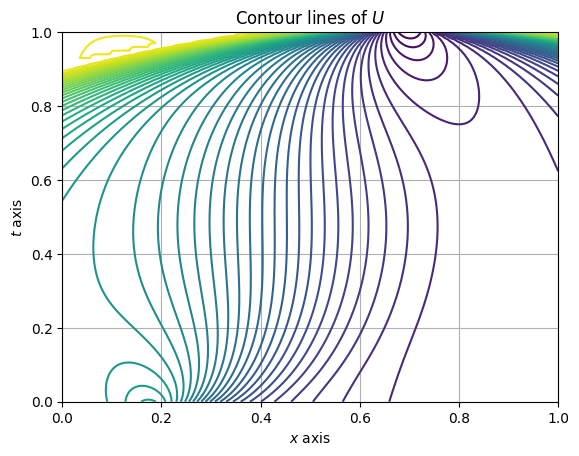

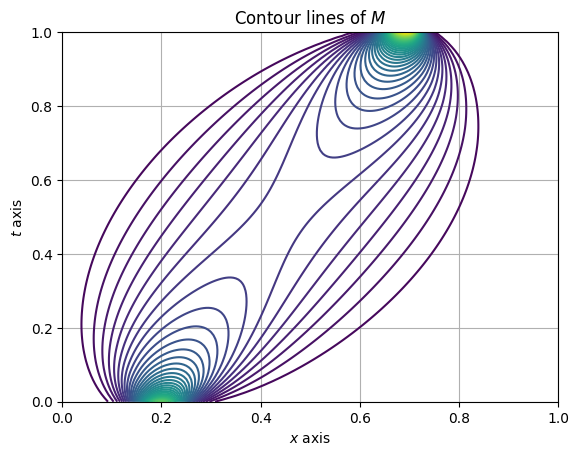

In [11]:
plt.contour(space_grid, time_grid, U_fixed, levels=50)
plt.title("Contour lines of $U$")
plt.xlabel("$x$ axis")
plt.ylabel("$t$ axis")
plt.grid()
plt.show()

plt.contour(space_grid, time_grid, M_fixed, levels=50)
plt.grid()
plt.title("Contour lines of $M$")
plt.xlabel("$x$ axis")
plt.ylabel("$t$ axis")
plt.show()

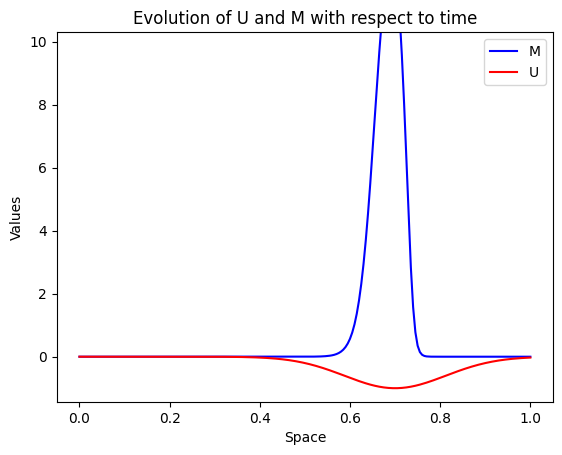

In [12]:
fig, ax = plt.subplots()

line1, = ax.plot(space_grid, M_fixed[0, :], color='blue', label='M')
line2, = ax.plot(space_grid, U_fixed[0, :], color='red', label='U')

ax.legend(loc='best')
ax.set_title('Evolution of U and M with respect to time')
ax.set_xlabel('Space')
ax.set_ylabel('Values')

def init():
    line1.set_ydata([np.nan] * len(space_grid))
    line2.set_ydata([np.nan] * len(space_grid))
    return line1, line2

def animate(i):
    line1.set_ydata(M_fixed[i, :])
    line2.set_ydata(U_fixed[i, :])
    return line1, line2


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=100, blit=True, frames=len(time_grid)
)
writer = animation.FFMpegWriter(fps=10, metadata=dict(artist='Me'), bitrate=1800)
ani.save('video_mfg.mp4', writer='ffmpeg')


HTML(ani.to_jshtml())

**Remark:** We can notice from the different graphs obtained that we have two main focus points :

*   One at $x = 0.2$
*   The other one at $x = 0.7$

We can guess that this comes from the functions $\phi (x, m) = - \ exp(-40(x - 0.7)^2)$ and $m_0(x) = \sqrt{\frac{300}{\pi}} exp(-300(x - 0.2)^2)$


## **Theoretical Questions**

1. **Understand why the mass of $M^n$, i.e. $\sum_{i = 0}^{Nh - 1} M_i^n$, does not depend on n**

We consider that $M^n$ is a vector column. We recall that:

$$
M^n = (I_{Nh} - \nu \Delta t D_x^2 + \Delta t (J_H)^T) M^{n+1} := B \ M^{n+1}
$$

Let $v = (1 \ 1 \ ... \ 1) \in \mathbb{R}^{Nh}$. If we can prove that $B^T \ v = v$, then we are done as this would imply that $v^T \ B = v^T$ and then $v^T \ B \ M^{n+1} = v^T \ M^n \ \implies v^T \ M^{n+1} = v^T \ M^n$, which is basically what we are trying to show.

We have

$$
B^T \ v = (I_{Nh} - \nu \Delta t D_x^2 + \Delta t (J_H)^T) \ v
$$

The definition of the Jacobian matrix $J_H$ implies that the sum of the coefficients of $J_H$ over each row is zero and the same goes for matrix $D_x^2$ so that $(B^T \ v)_i = v_i$

Hence $B^T \ v = v $ and we can conclude.

2. **Try to prove uniqueness in the discrete HJB equation, i.e. that given $(M^n)_n$, $(U^n)_n$ is unique. Hint: take two solutions $(U^n)_n$ and $(V^n)_n$ and consider $n_0, i_0$ such that $max_{(n,i)} \ (U^n_i - V^n_i )$ is achieved at ($n_0,i_0$), and use the monotonicity of the discrete Hamiltonian**

Let $(U^n)_n$ and $(V^n)_n$ be two solutions of the HJB equation (given $(M^n)_n$). We consider $(n_0, i_0)$ such that $U_{i_0}^{n_0} - V_{i_0}^{n_0} = \max_{(n,i)}(U_i^n - V_i^n)$. Thus:


$$
\begin{equation*}
-(D_t U_{i_0})^{n_0} - \nu (\Delta_h U^{n_0})_{i_0} + \tilde{H}([\nabla_h U^{n_0}]_{i_0}, M_{i_0}^{n_0+1}) = -(D_t V_{i_0})^{n_0} - \nu (\Delta_h V^{n_0})_{i_0} + \tilde{H}([\nabla_h V^{n_0}]_{i_0}, M_{i_0}^{n_0+1})
\end{equation*}
$$

We can rearrange the terms:

$$
\begin{equation*}
\tilde{H}([\nabla_h U^{n_0}]_{i_0}, M_{i_0}^{n_0+1}) - \tilde{H}([\nabla_h V^{n_0}]_{i_0}, M_{i_0}^{n_0+1}) = (D_t U_{i_0})^{n_0} - (D_t V_{i_0})^{n_0} + \nu (\Delta_h U^{n_0})_{i_0} - \nu (\Delta_h V^{n_0})_{i_0}
\end{equation*}
$$

Knowing that $U_{i_0}^{n_0} - V_{i_0}^{n_0}$ is the largest difference possible, we have:

$$
\left\{
\begin{aligned}
& (D_t U_{i_0})^{n_0} - (D_t V_{i_0})^{n_0} = \frac{1}{\Delta t} \left( - (U_{i_0}^{n_0} - V_{i_0}^{n_0}) + (U_{i_0}^{n_0+1} - V_{i_0}^{n_0+1}) \right) \leq 0 \\
& \nu (\Delta_h U^{n_0})_{i_0} - \nu (\Delta_h V^{n_0})_{i_0} = \frac{\nu}{h^2} \left( (U_{i_0+1}^{n_0} - V_{i_0+1}^{n_0}) - 2(U_{i_0}^{n_0} - V_{i_0}^{n_0}) + (U_{i_0-1}^{n_0} - V_{i_0-1}^{n_0}) \right) \leq 0
\end{aligned}
\right.
$$

Hence,

$$
\tilde{H}((D U^{n_0})_{i_0}, (D U^{n_0})_{i_0-1}, M_{i_0}^{n_0+1}) \leq \tilde{H}((D V^{n_0})_{i_0}, (D V^{n_0})_{i_0-1}, M_{i_0}^{n_0+1}).
$$

However:

$$
\left\{
\begin{aligned}
& (D U^{n_0})_{i_0} - (D V^{n_0})_{i_0} = \frac{1}{h} \left( (U_{i_0+1}^{n_0} - V_{i_0+1}^{n_0}) - (U_{i_0}^{n_0} - V_{i_0}^{n_0}) \right) \leq 0 \\[6pt]
& (D U^{n_0})_{i_0-1} - (D V^{n_0})_{i_0-1} = \frac{1}{h} \left( (U_{i_0}^{n_0} - V_{i_0}^{n_0}) - (U_{i_0-1}^{n_0} - V_{i_0-1}^{n_0}) \right) \geq 0
\end{aligned}
\right.
$$

As $\tilde{H}$ is non-increasing in its first argument $p_1$ and non-decreasing in its second argument $p_2$ (Monotonicity), it follows that:

$$
\begin{aligned}
\tilde{H}((D U^{n_0})_{i_0}, (D U^{n_0})_{i_0-1}, M_{i_0}^{n_0+1}) &\leq \tilde{H}((D V^{n_0})_{i_0}, (D V^{n_0})_{i_0-1}, M_{i_0}^{n_0+1}) \\\\
&\leq \tilde{H}((D U^{n_0})_{i_0}, (D V^{n_0})_{i_0-1}, M_{i_0}^{n_0+1}) \quad \text{by non-increasing property} \\\\
&\leq \tilde{H}((D U^{n_0})_{i_0}, (D U^{n_0})_{i_0-1}, M_{i_0}^{n_0+1}) \quad \text{by non-decreasing property}
\end{aligned}
$$

We conclude that
$$
\tilde{H}((DU^{n_0})_{i_0}, (DU^{n_0})_{i_0-1}, M_{i_0}^{n_0+1}) = \tilde{H}((DV^{n_0})_{i_0}, (DV^{n_0})_{i_0-1}, M_{i_0}^{n_0+1}).
$$

A sum of negative numbers is equal to 0 whenever all of the terms are identically null. It then translates to

$$
\begin{cases}
(D_t U_{i_0})^{n_0} - (D_t V_{i_0})^{n_0} = 0 \\[6pt]
\nu (\Delta_h U^{n_0})_{i_0} - \nu (\Delta_h V^{n_0})_{i_0} = 0
\end{cases}
$$

From what we said above, we conclude that the maximum of $( U_i^n - V_i^n)$ is also reached on the adjacent points of $((i_0, n_0))$. The arguments we developed then propagate until we reach the boundary condition

$$
U_i^{N_T} = V_i^{N_T} = \phi(M_i^{N_T}) \quad \text{for all } 0 \leq i < N_h,
$$

which implies that
$$
max_{(i,n)} (U_i^n - V_i^n) = 0.
$$

Hence $ ( U = V )$ and the solution to the HJB equation is unique.


3. **Try to prove uniqueness in the discrete KFP equation, i.e. that given $(U^n)_n$ and $(M^{̃n})_n$, $(M^n)_n$ is unique. Hint: prove that the matrices of the linear systems arising in the discrete KFP are the conjugate of M-matrices.**

We know that finding $( M^{n+1})$ given $( M^n)$ and $((U^n)_n)$ amounts to solving equation 29. We recall it:

$$
\left( I_{N_h} - \nu \Delta t D_x^2 + \Delta t (J_H)^T \right)M^{n+1} := B \ M^n \tag{35}
$$

We will show that $( B^T)$ has the $(M)$-property.

- **First**, $( B^T_{i,i} = B_{i,i} > 0 )$ for all $( 0 \leq i < N_h)$. Indeed:

$$
B_{i,i} = 1 - \nu \Delta t \cdot \frac{-1 \text{ or } -2}{h^2} + \Delta t \cdot (J_H)^T_{i,i} \geq 1 + \nu \Delta t \cdot \frac{1}{h^2} + \Delta t \cdot (J_H)^T_{i,i}
$$

which is strictly greater than 0, recalling the form of $( J_H )$ in equations 19 - 21.

- **Second**, for $( j \neq i )$, we have on the other hand $( B^T_{i,j} \leq 0)$. Indeed:

$$
B^T_{i,j} = -\nu \Delta t \cdot \frac{1}{h^2} + \Delta t \cdot (J_H)_{i,j} \leq 0
$$

for the same reason.

- **Finally**, $( \sum_{j=0}^{N_h - 1} B^T_{i,j} > 0)$ comes from the fact that the sum of coefficients over any row of $( J_H )$ is null (this also holds for $( D_x^2 $)), which leads to

$$
\sum_{j=0}^{N_h - 1} B^T_{i,j} = 1 - \nu \Delta t \cdot 0 + \Delta t \cdot 0 > 0
$$

As a result, $( B^T)$ has the $( M)$-property, so $( B^T)$ is invertible and $( B )$ is also invertible. Hence, the system $( BM^{n+1} = M^n)$ has a unique solution $( M^{n+1} \in \mathbb{R}^{N_h})$. The KFP equation therefore has a unique solution.


4. **Try to prove that if $M_0$ is positive, then $M_n$ is positive for all $n$.**

From the previous question, we know that $(M^n)_n$ satisfies

$$
B M^{n+1} = M^n,
$$

with $B^T $ an $M$-matrix. It follows that the entries of $(B^T)^{-1}$ are all nonnegative, so do the entries of $B^{-1}$. As a result,

$$
M^{n+1} = B^{-1} M^n
$$

implies that whenever $ M^n \geq 0 $, we also have $M^{n+1} \geq 0$.

Finally, from $M^0 \geq 0 $, we get $M^1 \geq 0$, and then $M^2 \geq 0$, and so on. Hence,

$$
M^0 \geq 0
$$

does imply that $M^n$ is positive for all $n$.


# **5. Mean Field Control**

$$
- \frac{\partial u}{\partial t}(t, x) - \nu \frac{\partial^2 u}{\partial x^2}(t, x)
+ \frac{1}{\beta} \frac{|\frac{\partial u}{\partial x}(t, x)|^\beta}{(c_0 + c_1 m(t, x))^\alpha}
- \frac{c_1 \alpha}{\beta} \frac{m(t, x) |\frac{\partial u}{\partial x}(t, x)|^\beta}{(c_0 + c_1 m(t, x))^{\alpha + 1}}
= g(x) + \tilde{f}_0(m(t, x)) + m(t, x) \tilde{f}_0'(m(t, x))
\quad \text{in } [0, T] \times \Omega, \tag{21}
$$

$$
\frac{\partial m}{\partial t}(t, x) - \nu \frac{\partial^2 m}{\partial x^2}(t, x)
- \frac{\partial}{\partial x} \left(
\frac{m(t, \cdot)}{(c_0 + c_1 m(t, \cdot))^\alpha}
\left| \frac{\partial u}{\partial x}(t, \cdot) \right|^{\beta - 2}
\frac{\partial}{\partial x} u(t, \cdot)
\right)(x) = 0,
\quad \text{in } (0, T] \times \Omega, \tag{22}
$$

$$
\frac{\partial u}{\partial x}(t, 0) = \frac{\partial u}{\partial x}(t, 1) = 0,
\quad \text{on } (0, T), \tag{23}
$$

$$
\frac{\partial m}{\partial x}(t, 0) = \frac{\partial m}{\partial x}(t, 1) = 0,
\quad \text{on } (0, T), \tag{24}
$$

$$
u(T, x) = \phi(x),
\quad m(0, x) = m_0(x),
\quad \text{in } \Omega. \tag{25}
$$


The only difference between thus problem and the previous one relies on the first equation $(21)$. We just have to define a new Hamiltonian given by :

$$
H(t, x) = \frac{1}{\beta}\frac{|\frac{\partial u}{\partial x}(t, x)|^\beta}{(c_0 + c_1m(t, x))^\alpha} \left(1- \frac{c_1 \alpha m(t, x)}{c_0 + c_1m(t, x)}\right)
$$

The discrete Hamiltonian is thus given by:

$$
\tilde{H}(p_1, p_2, \mu) = \frac{1}{\beta} \frac{\left( (p_1)_-^2 + (p_2)_+^2 \right)^{\frac{\beta}{2}}}{(c_0 + c_1 \mu)^\alpha} \left( 1 - \frac{c_1 \alpha \mu}{c_0 + c_1 \mu}\right)
$$


In [125]:
beta = 2
c0 = 0.1
c1 = 1
alpha = 0.5
sigma = 0.02
nu = sigma**2 / 2
theta = 1e-2
newton_stopping_criteria = 1e-12
fixed_point_stopping_criteria = 2e-5

nu_over_h2 = nu/h**2
sqrt_N_h = np.sqrt(N_h)

def f0_tilde(m):
    return 0

In [126]:
def compute_F(U_next, U_now, M, denominator):
    F = - (U_next - U_now) / dt - nu * Dx2 @ U_now
    coef = denominator * (1 - (c1 * alpha * M) / (c0 + c1 * M))
    hamiltonian_term = coef * (((np.minimum(0, Dx @ U_now))**2 + (np.maximum(0, Dx_shift @ U_now))**2)**(beta/2))
    F += hamiltonian_term - f0_tilde(M)
    return F

def compute_JH(U, M):
    backward_spatial_diff = np.maximum(np.diff(U, prepend=U[0])/h, 0)
    forward_spatial_diff = -np.minimum(np.diff(U, append=U[-1])/h, 0)
    coef = backward_spatial_diff**2 + forward_spatial_diff**2
    coef = (1 / (c0 + c1 * M) ** alpha) * np.power(coef, beta/2-1, out=np.zeros_like(coef), where=(coef!=0))

    main_diag = (1/h) * (forward_spatial_diff + backward_spatial_diff) * coef
    sub_diag = (-1/h) * backward_spatial_diff * coef
    sup_diag = (-1/h) * forward_spatial_diff * coef

    banded_matrix = np.zeros((3, U.size))
    banded_matrix[0, 1:] = sup_diag[:-1]
    banded_matrix[1] = main_diag
    banded_matrix[2, :-1] = sub_diag[1:]
    return banded_matrix

def compute_J_banded(U, M, denominator):
    backward_spatial_diff = np.maximum(np.diff(U, prepend=U[0])/h, 0)
    forward_spatial_diff = -np.minimum(np.diff(U, append=U[-1])/h, 0)
    coef = backward_spatial_diff**2 + forward_spatial_diff**2
    coef = denominator * (1 - (c1 * alpha * M) / (c0 + c1 * M)) * np.power(coef, beta/2-1, out=np.zeros_like(coef), where=(coef!=0))

    sub_diag = (-1/h) * backward_spatial_diff * coef
    main_diag = (1/h) * (forward_spatial_diff + backward_spatial_diff) * coef
    sup_diag = (-1/h) * forward_spatial_diff * coef

    banded_matrix = np.zeros((3, U.size))
    banded_matrix[0, 1:] = sup_diag[:-1] - nu_over_h2
    banded_matrix[1] = main_diag + 1/dt + 2*nu_over_h2
    banded_matrix[2, :-1] = sub_diag[1:] - nu_over_h2
    return banded_matrix


[Fixed Point] Iteration 50, previous norm: 0.009729714027544432, theta: 0.01, elapsed time: 28.417726755142212


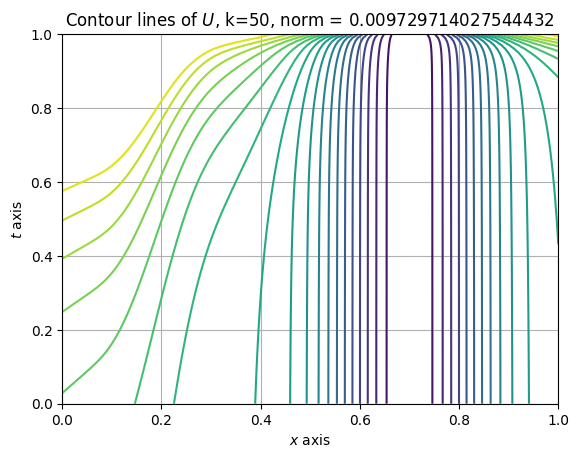

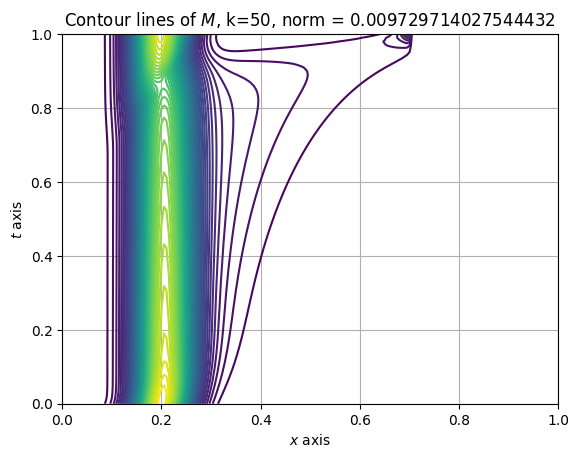

[Fixed Point] Iteration 100, previous norm: 0.007928620839058953, theta: 0.01, elapsed time: 55.78197717666626


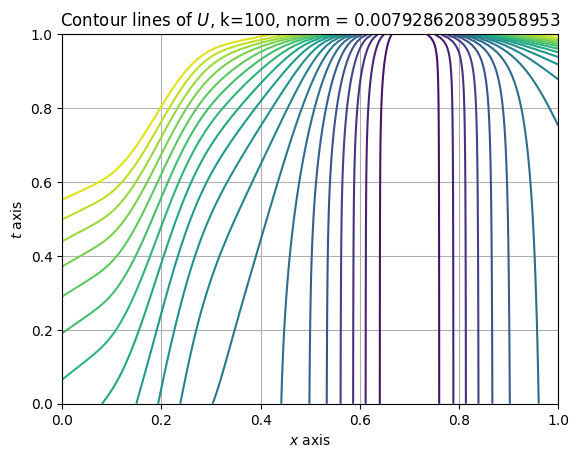

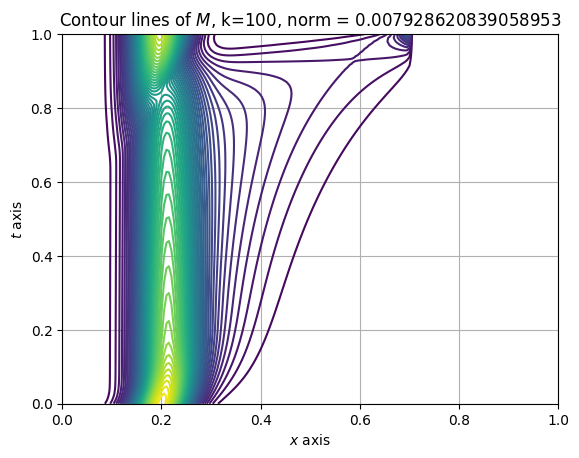

[Fixed Point] Iteration 150, previous norm: 0.006652545791303334, theta: 0.01, elapsed time: 89.44991755485535


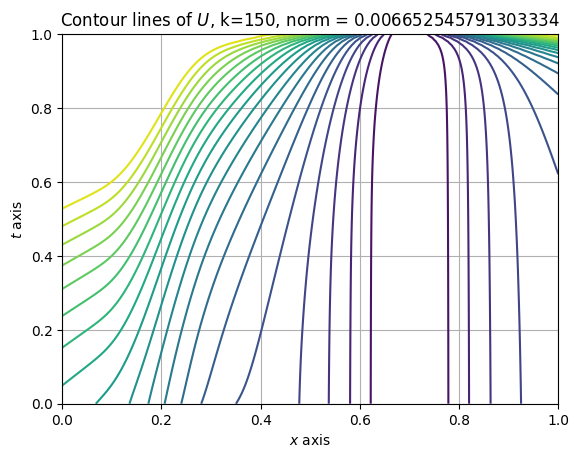

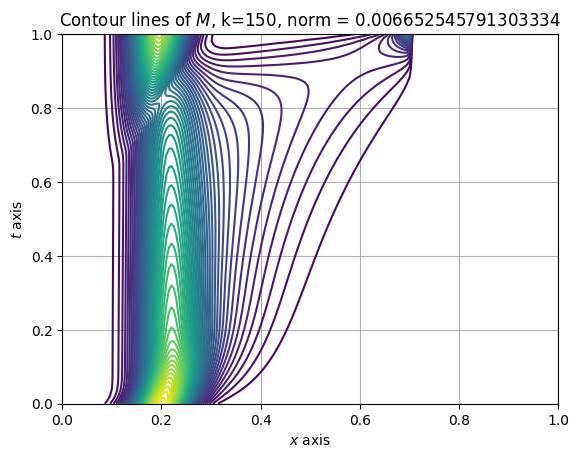

[Fixed Point] Iteration 200, previous norm: 0.005704471388798482, theta: 0.01, elapsed time: 115.91831803321838


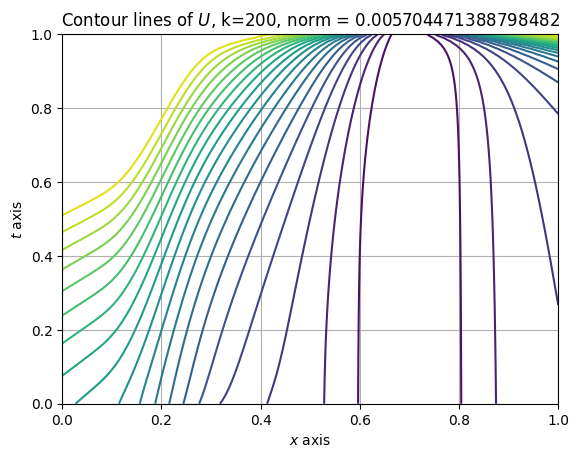

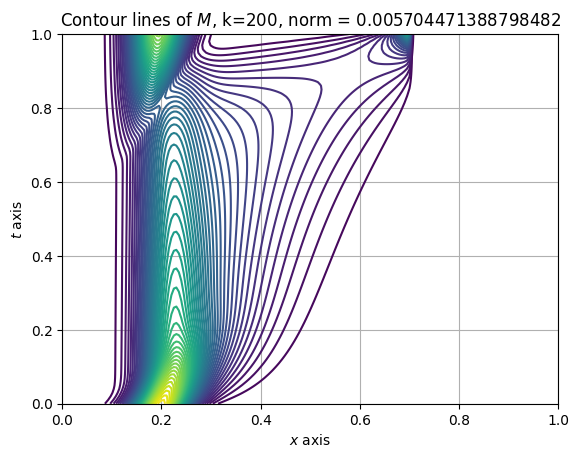

[Fixed Point] Iteration 250, previous norm: 0.004975147568294083, theta: 0.01, elapsed time: 144.71065402030945


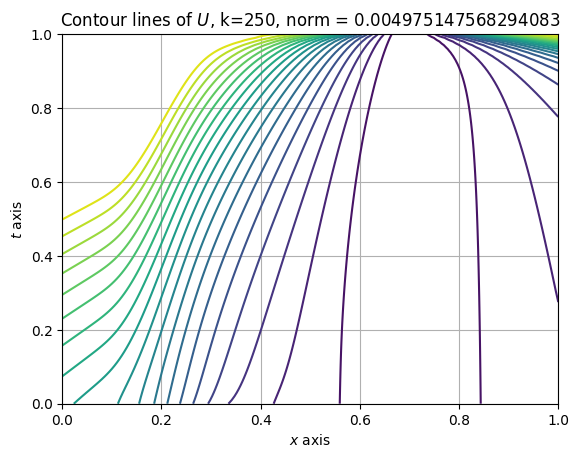

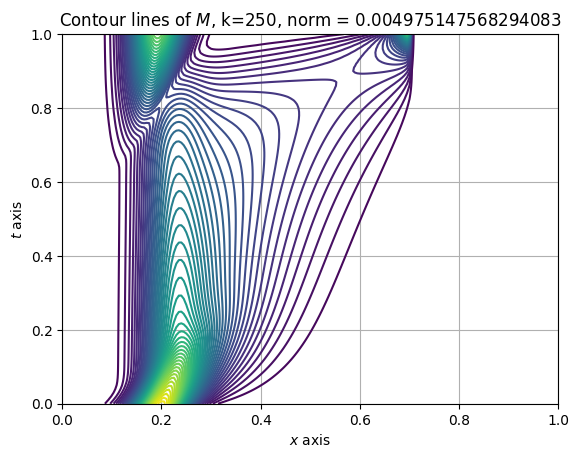

[Fixed Point] Iteration 300, previous norm: 0.004401089464074792, theta: 0.01, elapsed time: 171.9220676422119


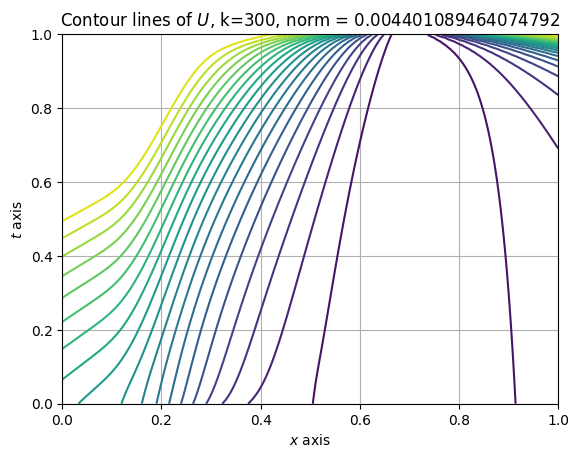

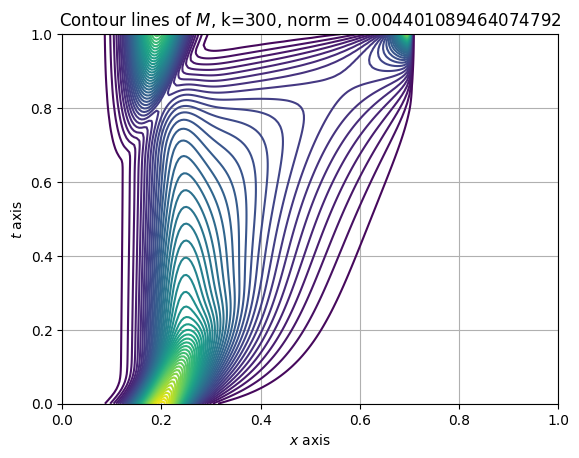

[Fixed Point] Iteration 350, previous norm: 0.003941620196897926, theta: 0.01, elapsed time: 209.92811822891235


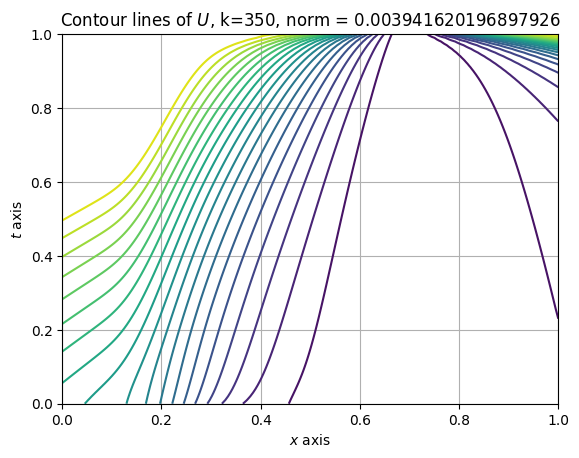

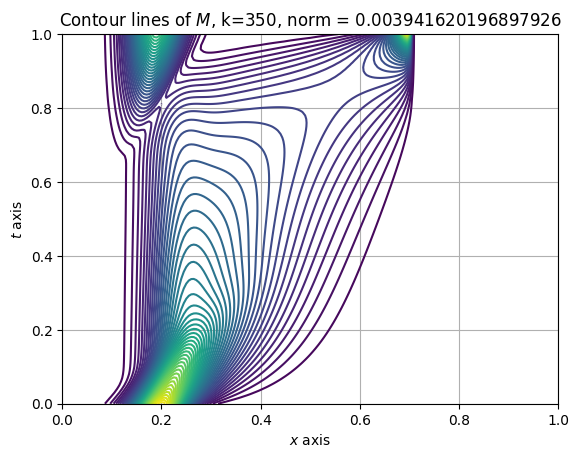

[Fixed Point] Iteration 400, previous norm: 0.0035688624581526065, theta: 0.01, elapsed time: 240.6812195777893


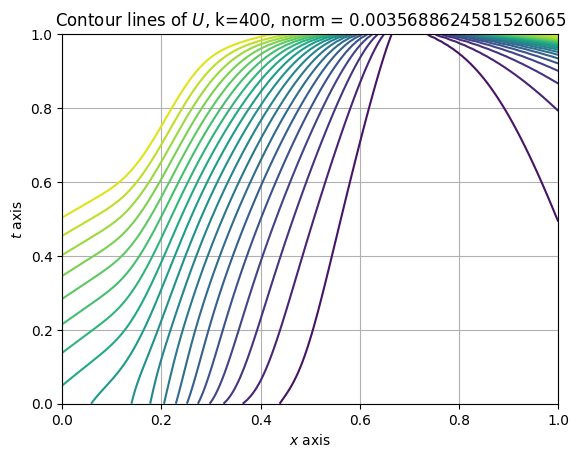

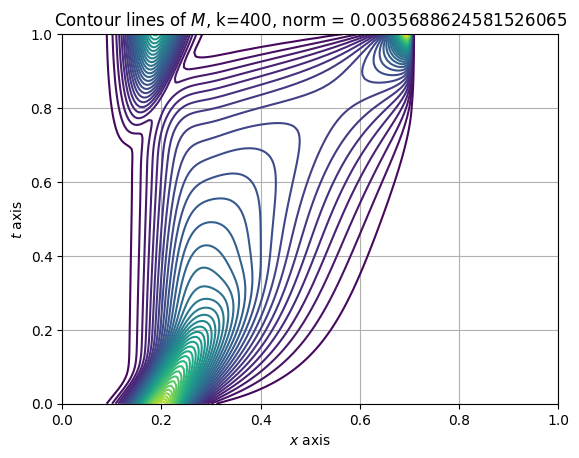

KeyboardInterrupt: 

In [129]:
M = np.zeros((N_T+1, N_h))
M[:] = m0_hat(space_grid)

U = np.zeros((N_T+1, N_h))
U[:] = phi(space_grid)

U_fixed2, M_fixed2 = FixedPoint(U, M, omega = 0.8)

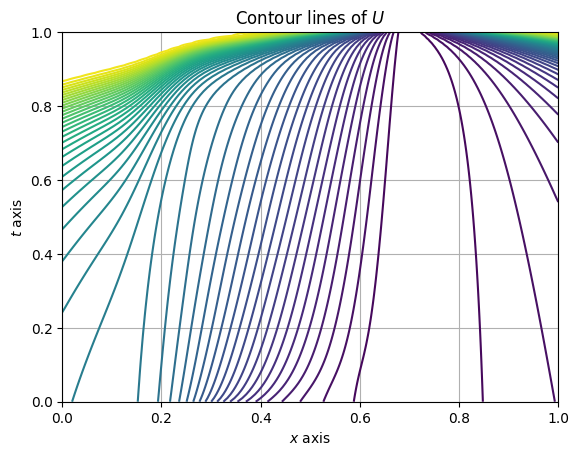

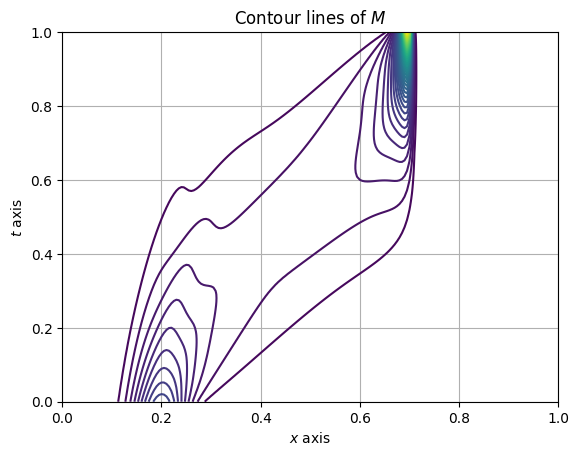

In [ ]:
plt.contour(space_grid, time_grid, U_fixed2, levels=50)
plt.title("Contour lines of $U$")
plt.xlabel("$x$ axis")
plt.ylabel("$t$ axis")
plt.grid()
plt.show()

plt.contour(space_grid, time_grid, M_fixed2, levels=50)
plt.grid()
plt.title("Contour lines of $M$")
plt.xlabel("$x$ axis")
plt.ylabel("$t$ axis")
plt.show()

### **2. Compare with the solution of the MFG with the same parameters**

We can notice that the whole shape of the solution for MFG (Mean Field Game) and MFC (Mean Field Control) are approximately similar. However, there are more field lines with MFG that are regular compared to those of MFC.